In [1]:
#2
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
#3
from gensim.downloader import load
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
import time
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_json('goemotions.json')
df.columns = ['post', 'emotion', 'sentiment']

In [3]:
df.head()

,post,emotion,sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive


In [4]:
file=pd.read_json('goemotions.json')
emotion= file[1].value_counts()
print(emotion)
sentiment = file[2].value_counts()
print(sentiment)

neutral           55298
approval          11259
admiration        10531
annoyance          8342
disapproval        7686
gratitude          7075
amusement          6130
curiosity          5885
anger              5202
love               4957
confusion          4938
realization        4714
disappointment     4706
optimism           4519
joy                4329
sadness            3827
caring             3523
surprise           3472
excitement         3020
disgust            2914
desire             2147
fear               1778
remorse            1510
embarrassment      1433
nervousness         796
relief              788
pride               690
grief               351
Name: 1, dtype: int64
positive     58968
neutral      55298
negative     38545
ambiguous    19009
Name: 2, dtype: int64


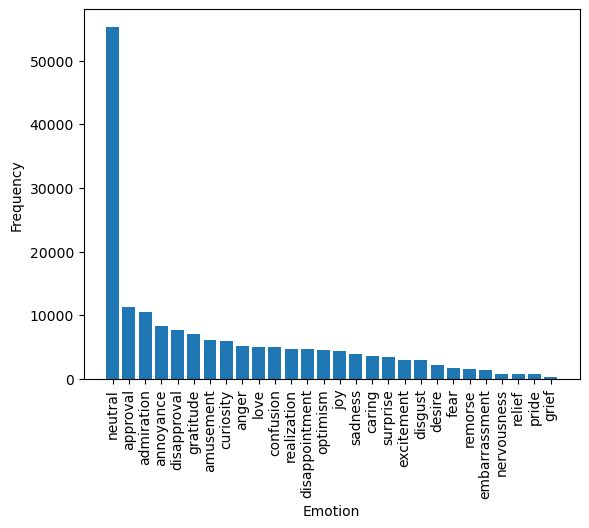

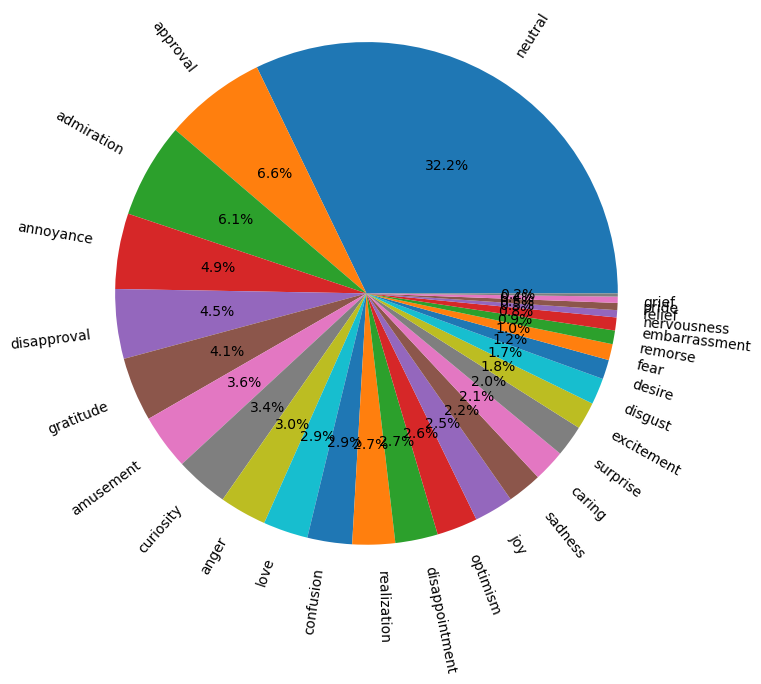

In [5]:
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(emotion.keys(),emotion)
plt.show()
e=[]
s=[]
for key,value in emotion.items():
    e.append(key)
    s.append(value)
plt.pie(s,labels=e,rotatelabels=True,autopct='%0.1f%%',labeldistance=1.1,radius=1.7)
plt.show()

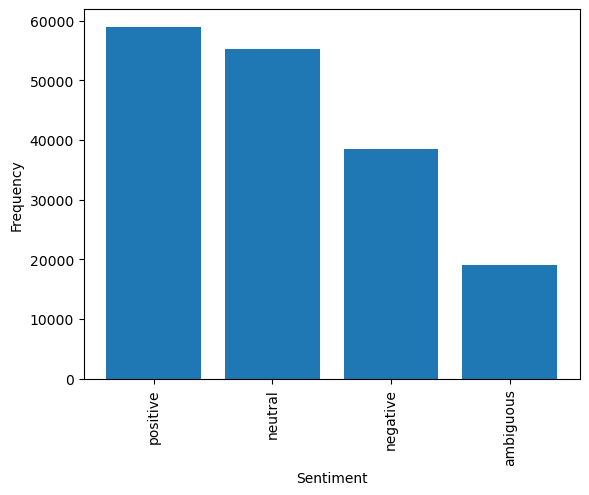

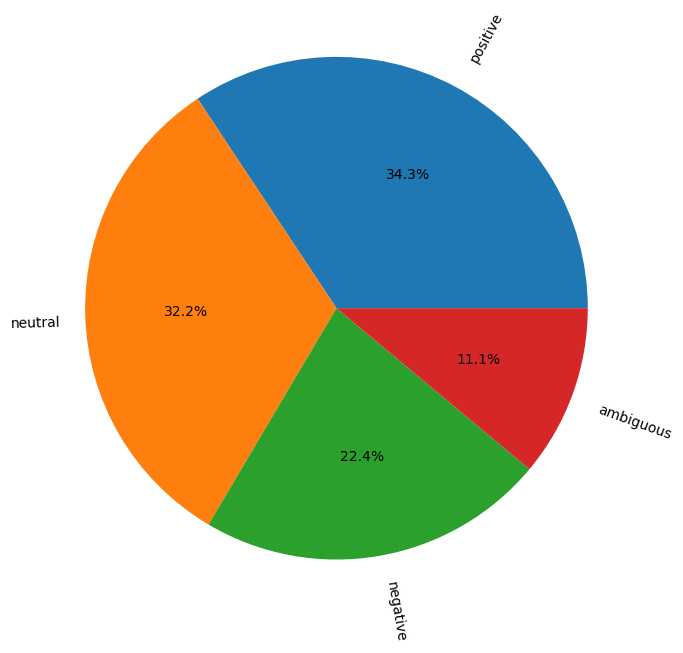

In [6]:
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(sentiment.keys(),sentiment)
plt.show()

e=[]
s=[]
for key,value in sentiment.items():
    e.append(key)
    s.append(value)
plt.pie(s,labels=e,rotatelabels=True,autopct='%0.1f%%',labeldistance=1.1,radius=1.7)
plt.show()

### 2.1. Process the dataset using feature_extraction.text.CountVectorizer to extract tokens/words and their frequencies.

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.post)

In [8]:
print(X.shape[1])

30449


### 2.2. Split the dataset into 80% for training and 20% for testing. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, df[['emotion', 'sentiment']], test_size=0.2)

### 2.3. Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features.

In [10]:
performance_data = []
def train_model(model, model_name):
    for label in ['emotion', 'sentiment']:
        start=time.time()
        print(f'{label} train {label} start: {start}')
        model.fit(X_train, y_train[label])
        end=time.time()
        print(f'{label} train {label} end: {end} take time:{end-start}')
        start=time.time()
        y_pred = model.predict(X_test)
        end=time.time()
        print(f'{label} predict {label} end: {end} take time:{end-start}')
        performance_data.append([f'{model_name}, {label}', confusion_matrix(y_test[label], y_pred), classification_report(y_test[label], y_pred)])

In [11]:
def grid_search(model, model_name, params):
    clf = GridSearchCV(model, params, cv=2, n_jobs=-1)
    for label in ['emotion', 'sentiment']:
        clf.fit(X_train, y_train[label])
        param_str = ''
        for k, v in clf.best_params_.items():
            param_str += "{0}_{1}".format(k,v)
        y_pred = clf.best_estimator_.predict(X_test)
        performance_data.append([f"{model_name}, {param_str[:-1]}, {label}", confusion_matrix(y_test[label], y_pred), classification_report(y_test[label], y_pred)])

#### 2.3.1. Base-MNB: a Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) with the default parameters.

In [12]:
base_mnb = MultinomialNB()
train_model(base_mnb, 'MultinomialNB')

emotion train emotion start: 1666394416.4477687
emotion train emotion end: 1666394417.019929 take time:0.5721602439880371
emotion predict emotion end: 1666394417.0293653 take time:0.009436368942260742
sentiment train sentiment start: 1666394417.6521854
sentiment train sentiment end: 1666394418.0460427 take time:0.3938572406768799
sentiment predict sentiment end: 1666394418.0495186 take time:0.0034759044647216797


#### 2.3.2. Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters

In [13]:
base_dt = DecisionTreeClassifier()
train_model(base_dt, 'DecisionTreeClassifier')

emotion train emotion start: 1666394418.618565
emotion train emotion end: 1666394473.8676999 take time:55.24913477897644
emotion predict emotion end: 1666394473.892534 take time:0.024834156036376953
sentiment train sentiment start: 1666394474.489807
sentiment train sentiment end: 1666394521.2828693 take time:46.79306244850159
sentiment predict sentiment end: 1666394521.301743 take time:0.01887369155883789


#### 2.3.3. Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.

In [14]:
base_mlp = MLPClassifier(max_iter=3)
train_model(base_mlp, 'MLPClassifier')

emotion train emotion start: 1666394521.8689983
emotion train emotion end: 1666394652.5859935 take time:130.7169952392578
emotion predict emotion end: 1666394652.6207602 take time:0.03476667404174805
sentiment train sentiment start: 1666394653.1423447
sentiment train sentiment end: 1666394783.44319 take time:130.30084538459778
sentiment predict sentiment end: 1666394783.4784527 take time:0.0352625846862793


#### 2.3.4. Top-MNB: a better performing Multinomial Naive Bayes Classifier found using GridSearchCV

In [15]:
mnb_params = {'alpha': [0.5, 0, 2]}
grid_search(base_mnb, 'MultinomialNB', mnb_params)

#### 2.3.5. Top-DT: a better performing Decision Tree found using GridSearchCV. 

In [16]:
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 3],
             'min_samples_split': [2, 3, 4]}
grid_search(base_dt, 'DecisionTreeClassifier', dt_params)

#### 2.3.6. Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.

In [17]:
mlp_params = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
              'solver': ['adam', 'sgd']}
grid_search(base_mlp, 'MLPClassifier', mlp_params)

### 2.4. For each of the 6 classifiers above and each of the classification tasks (emotion or sentiment), produce and save the following information in a file called performance.

In [18]:
with open('performance.txt', 'w') as f:
    for line in performance_data:
        line = list(map(str, line))
        f.write(",".join(line))

### 2.5. Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer for this. Display the results of this experiment.

In [19]:
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, df[['emotion', 'sentiment']], test_size=0.2)

In [20]:
performance_data = []
base_mnb = MultinomialNB()
train_model(base_mnb, 'MultinomialNB')

base_dt = DecisionTreeClassifier()
train_model(base_dt, 'DecisionTreeClassifier')

base_mlp = MLPClassifier(max_iter=3)
train_model(base_mlp, 'MLPClassifier')

grid_search(base_mnb, 'MultinomialNB', mnb_params)

grid_search(base_dt, 'DecisionTreeClassifier', dt_params)

grid_search(base_mlp, 'MLPClassifier', mlp_params)

emotion train emotion start: 1666395067.5970743
emotion train emotion end: 1666395068.1200643 take time:0.5229899883270264
emotion predict emotion end: 1666395068.129004 take time:0.008939743041992188
sentiment train sentiment start: 1666395068.691231
sentiment train sentiment end: 1666395069.0716777 take time:0.3804466724395752
sentiment predict sentiment end: 1666395069.0746574 take time:0.0024831295013427734
emotion train emotion start: 1666395069.6050975
emotion train emotion end: 1666395124.1390667 take time:54.53396916389465
emotion predict emotion end: 1666395124.1589334 take time:0.0198667049407959
sentiment train sentiment start: 1666395124.77331
sentiment train sentiment end: 1666395171.3959546 take time:46.622644662857056
sentiment predict sentiment end: 1666395171.4188008 take time:0.022846221923828125
emotion train emotion start: 1666395172.004868
emotion train emotion end: 1666395302.9351137 take time:130.93024563789368
emotion predict emotion end: 1666395302.968887 take 

In [21]:
pd.DataFrame(performance_data, columns=['Model', 'confusion matrix', 'classfication report'])

ValueError: 3 columns passed, passed data had 4 columns

### 3.1 use gensim.downloader.load to load the word2vec-google-news-300 pretrained embedding model


In [22]:

wordvec2model=load('word2vec-google-news-300')

### 3.2 Use the tokenizer from nltk to extract words from the Reddit posts. Display the number of tokens in the training set.

In [23]:
file = pd.read_json("goemotions.json")
words=file[0]
tokenizer=[word_tokenize(x) for x in words]

In [24]:
list_tokens=[]
list_tokens=[k for k in tokenizer for i in k]
list_len=len(list_tokens)
print(f'There are {list_len} Reddit post tokens in goemotions.json')

There are 2642128 Reddit post tokens in goemotions.json


In [25]:
emotion= file[1].value_counts()
print(emotion)

neutral           55298
approval          11259
admiration        10531
annoyance          8342
disapproval        7686
gratitude          7075
amusement          6130
curiosity          5885
anger              5202
love               4957
confusion          4938
realization        4714
disappointment     4706
optimism           4519
joy                4329
sadness            3827
caring             3523
surprise           3472
excitement         3020
disgust            2914
desire             2147
fear               1778
remorse            1510
embarrassment      1433
nervousness         796
relief              788
pride               690
grief               351
Name: 1, dtype: int64


In [26]:
sentiment = file[2].value_counts()
print(sentiment)

positive     58968
neutral      55298
negative     38545
ambiguous    19009
Name: 2, dtype: int64


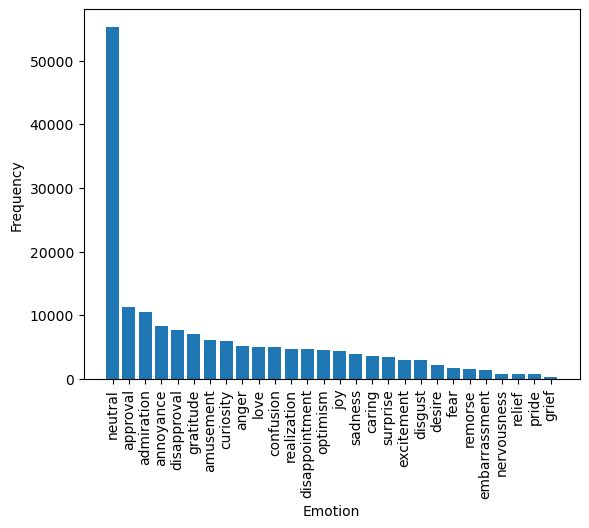

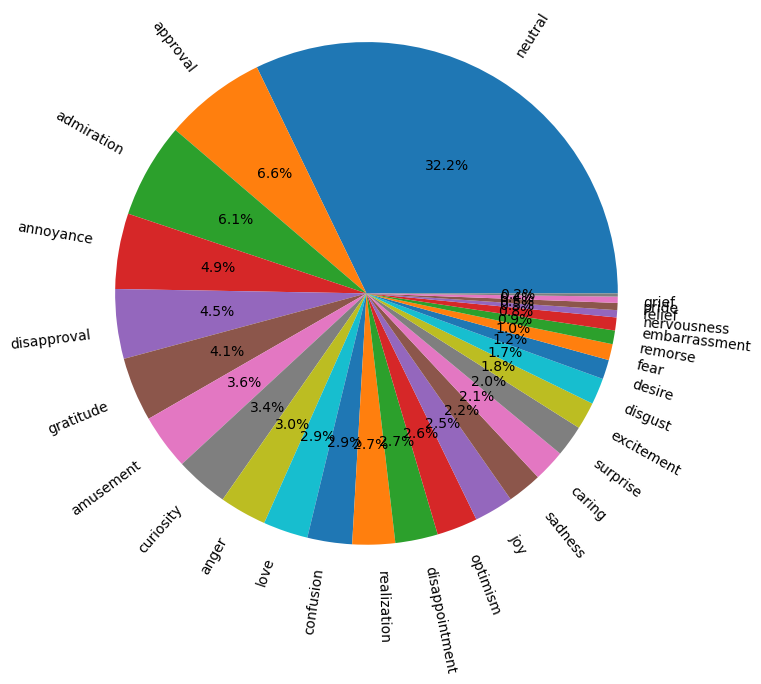

In [27]:
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(emotion.keys(),emotion)
plt.show()
e=[]
s=[]
for key,value in emotion.items():
    e.append(key)
    s.append(value)
plt.pie(s,labels=e,rotatelabels=True,autopct='%0.1f%%',labeldistance=1.1,radius=1.7)
plt.show()

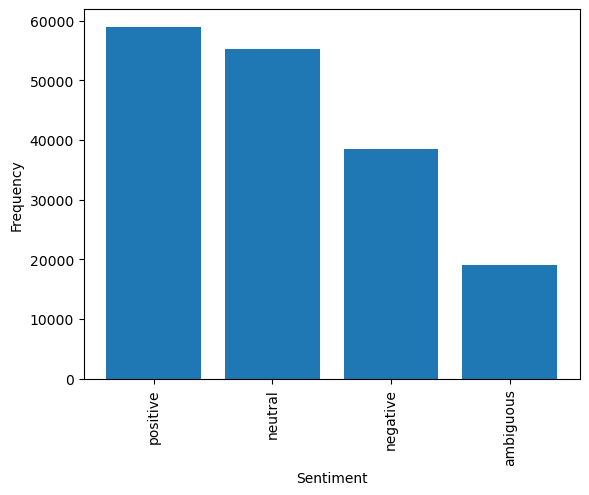

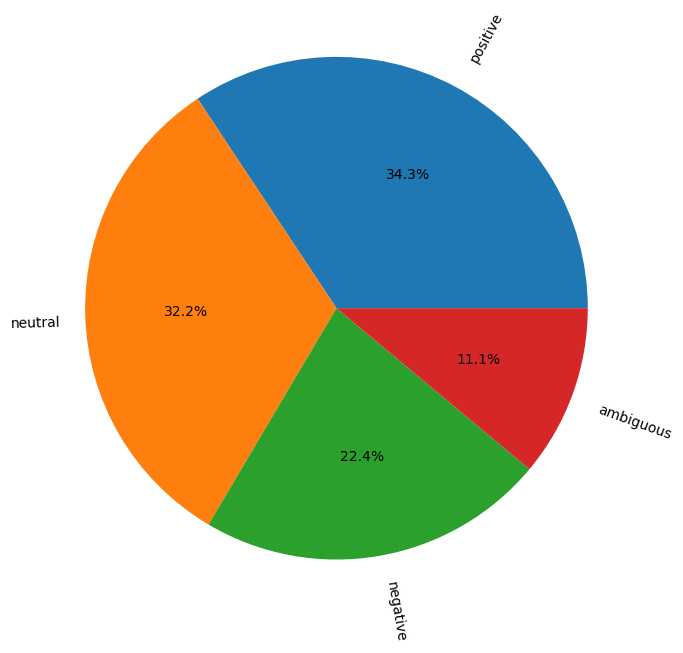

In [28]:
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(sentiment.keys(),sentiment)
plt.show()

e=[]
s=[]
for key,value in sentiment.items():
    e.append(key)
    s.append(value)
plt.pie(s,labels=e,rotatelabels=True,autopct='%0.1f%%',labeldistance=1.1,radius=1.7)
plt.show()

### 3.3 Compute the embedding of a Reddit post as the average of the embeddings of its words. If a word has no embedding in Word2Vec, skip it.

In [29]:
redditpositone=list_tokens[1]
print(redditpositone)

['That', 'game', 'hurt', '.']


In [30]:
vecter_list=[wordvec2model[word] for word in redditpositone if word in wordvec2model.index_to_key]

word_filtered_list=[word for word in redditpositone if word in wordvec2model.index_to_key]
word_vec= zip(word_filtered_list,vecter_list)
dict_tokens=dict(word_vec)
df=pd.DataFrame.from_dict(dict_tokens,orient='index')
df.head(len(dict_tokens))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
That,-0.138672,0.125977,0.326172,0.099609,-0.237305,0.014832,0.049805,-0.091797,0.205078,0.296875,...,-0.150391,0.013367,-0.242188,0.043213,-0.129883,-0.320312,0.126953,0.049561,0.253906,-0.181641
game,0.114746,0.052734,0.042969,0.004486,0.273438,0.071777,0.173828,-0.198242,0.020752,0.118652,...,-0.212891,0.043213,-0.139648,-0.011597,0.228516,0.170898,-0.010437,-0.094238,-0.172852,-0.052734
hurt,-0.003891,0.092773,-0.009277,0.061768,-0.100586,0.239258,0.104004,0.013977,0.183594,0.263672,...,0.196289,0.154297,-0.160156,-0.081543,-0.215820,0.078613,-0.363281,-0.065918,0.119141,-0.165039


In [31]:
average=[]
k=0
for x in range(0,wordvec2model.vector_size-1):
    for j in range(0,len(dict_tokens)-1):
        k+=df[x][j]
    average.append(k/len(dict_tokens))
df=pd.DataFrame(average,columns=['average'])
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
average,-0.007975,0.051595,0.174642,0.20934,0.221385,0.250254,0.324799,0.228119,0.303396,0.441905,...,0.222953,0.10186,0.120719,-0.006559,0.00398,0.036857,-0.012948,0.025891,0.010999,0.038017


In [62]:
X_train, X_test, y_train, y_test = train_test_split(tokenizer,file[[1,2]], test_size=0.2)


### 3.4 Compute and display the overall hit rates of the training and test sets (i.e. the % of words in the Reddit posts for which an embedding is found in Word2Vec).

In [85]:
print(len(X_train))
vocab=wordvec2model.index_to_key
print(len(vocab))
count=0
vecter_list=[]
word_filtered_list=[]
for words in X_train:
    count+=1
    print("search embeddings, till complete {:0.1%}".format(count/len(X_train)),end='\r')
    for word in words:
        if word in vocab:
            vecter_list.append(wordvec2model[word])
            word_filtered_list.append(word)
print(len(word_filtered_list))
print(len(vecter_list))
word_vec= zip(word_filtered_list,vecter_list)
dict_tokens=dict(word_vec)
df=pd.DataFrame.from_dict(dict_tokens,orient='index')
df.head(len(dict_tokens))

137456
3000000
1636851embeddings, till complete 100.0%
1636851


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Every,-0.089844,-0.023071,0.133789,0.117188,-0.006287,0.011902,0.019165,0.121094,0.302734,-0.010742,...,-0.002441,-0.038330,-0.029541,0.125977,-0.208008,-0.076660,-0.010559,-0.072754,0.066895,-0.200195
time,-0.047363,0.187500,0.002258,0.173828,-0.015991,-0.150391,0.113770,-0.015503,0.219727,-0.010132,...,-0.158203,0.031738,-0.179688,-0.162109,-0.038086,-0.063477,-0.103027,-0.003555,-0.062500,-0.055664
I,0.079102,-0.005035,0.111816,0.212891,0.130859,-0.014709,-0.035400,-0.077637,0.040771,0.114746,...,-0.125977,0.153320,-0.306641,-0.078613,-0.086426,-0.114746,-0.029297,-0.006775,0.042725,-0.103516
get,0.033203,-0.089844,-0.294922,0.115234,-0.071289,-0.053955,0.010498,0.119141,0.024536,0.080078,...,-0.021729,0.182617,-0.086914,0.096680,-0.012512,0.075684,0.004272,-0.126953,0.161133,-0.160156
staff,-0.175781,0.000984,-0.003418,0.042725,-0.208984,0.020020,-0.166992,0.034424,0.010559,-0.005249,...,-0.114746,-0.045410,-0.022461,0.095703,0.027344,0.079102,0.142578,-0.114746,-0.133789,-0.058350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Somerset,-0.292969,0.139648,-0.125000,-0.114258,-0.082031,-0.013245,-0.125000,0.281250,-0.118164,-0.051270,...,-0.102051,0.026123,-0.246094,-0.067871,-0.328125,-0.186523,0.337891,-0.134766,-0.129883,-0.166016
Bon,-0.024048,0.068848,0.019897,-0.125977,0.183594,-0.150391,-0.003418,-0.186523,0.037109,-0.214844,...,0.251953,0.182617,0.218750,0.273438,-0.095215,-0.302734,-0.036377,-0.110840,0.207031,0.248047
voyage,0.081543,0.443359,-0.353516,-0.140625,0.059570,-0.010071,0.173828,-0.174805,0.472656,0.251953,...,0.067871,-0.116211,-0.070312,0.188477,0.124023,0.029175,0.139648,0.153320,0.250000,-0.171875
sucka,0.040527,-0.018311,0.109375,0.226562,-0.083496,0.095215,0.084473,0.085449,-0.076660,0.060059,...,-0.004669,0.155273,-0.166016,-0.000227,-0.054688,-0.180664,-0.150391,-0.154297,-0.106445,0.030518


In [88]:
count_total=0
for words1 in X_train:
    for word1 in words1:
        count_total+=1
        
print()
print(count_total)


2113818


In [90]:
print('hit rate of X_train is: {:0.1%}'.format(len(vecter_list)/count_total))

hit rate of X_train is: 77.4%


In [91]:
print(len(X_test))
vocab=wordvec2model.index_to_key
print(len(vocab))
count=0
vecter_list=[]
word_filtered_list=[]
lens=len(X_test)
for words in X_test:
    count+=1
    print("search embeddings, till complete {:0.1%}".format(count/lens),end='\r')
    for word in words:
        if word in vocab:
            vecter_list.append(wordvec2model[word])
            word_filtered_list.append(word)
print(len(word_filtered_list))
print(len(vecter_list))
word_vec= zip(word_filtered_list,vecter_list)
dict_tokens=dict(word_vec)
df=pd.DataFrame.from_dict(dict_tokens,orient='index')
df.head(len(dict_tokens))

34364
3000000
409494 embeddings, till complete 100.0%
409494


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
You,0.078613,0.131836,0.189453,0.314453,-0.104004,0.183594,0.049316,0.041260,0.005554,-0.036133,...,-0.102051,0.159180,-0.240234,-0.034912,-0.040527,-0.229492,0.028931,-0.223633,-0.101074,0.033936
re,-0.044678,0.062988,0.069336,0.084961,-0.210938,0.098145,-0.388672,0.156250,0.089355,-0.318359,...,-0.051025,0.092773,-0.135742,0.151367,-0.010925,-0.038330,0.127930,-0.182617,-0.216797,-0.231445
number,0.139648,-0.041016,0.092773,-0.035645,-0.027100,-0.269531,-0.060547,0.013367,0.202148,0.128906,...,0.050049,0.046387,-0.083984,-0.236328,0.135742,0.092773,0.033691,0.021851,-0.107910,-0.060303
1,0.050781,-0.093262,0.064941,0.114258,-0.064941,-0.109863,0.092773,-0.081543,0.130859,0.125977,...,0.029419,0.017090,-0.162109,0.144531,-0.021240,0.079590,-0.212891,-0.168945,-0.041504,0.008179
now,0.026489,0.019165,0.021973,0.059814,-0.131836,0.066406,0.018799,-0.189453,0.122559,0.050537,...,-0.060547,0.051270,-0.053467,-0.041992,0.074219,-0.002655,0.129883,0.060059,0.071289,-0.058350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDA,-0.107422,-0.259766,0.132812,-0.292969,-0.337891,-0.032227,-0.039307,-0.106445,0.090820,-0.060059,...,0.023315,-0.036865,-0.162109,-0.015747,-0.098633,0.104492,-0.185547,0.129883,-0.008728,0.243164
gasping,0.160156,0.103516,0.375000,-0.093750,-0.253906,0.042480,-0.066406,0.114746,0.016724,0.192383,...,-0.187500,-0.500000,0.040527,-0.239258,0.089844,-0.298828,-0.181641,0.145508,-0.068848,0.227539
swampy,0.277344,-0.002762,-0.020264,0.025757,-0.015442,-0.001526,-0.369141,0.018433,0.046875,0.033691,...,-0.414062,0.110840,-0.361328,0.070801,0.015747,0.038818,0.083496,-0.265625,0.239258,0.026611
Nuggets,0.199219,-0.304688,0.003067,0.535156,-0.100098,-0.063965,0.001732,-0.337891,-0.241211,-0.199219,...,0.102539,0.122559,0.142578,-0.143555,0.146484,-0.010864,-0.410156,0.021484,0.470703,-0.111328


In [97]:
count_tota2=0
for words2 in X_test:
    for word2 in words2:
        count_tota2+=1
        
print()
print(count_tota2)
print('hit rate of X_test is: {:0.1%}'.format(len(vecter_list)/count_tota2))


528310
hit rate of X_test is: 77.5%
